In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib.keras.python.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, Activation
from tensorflow.contrib.keras.python.keras.models import Model, Sequential
from tensorflow.contrib.keras.python.keras.optimizers import RMSprop
from tensorflow.contrib.keras.python.keras.callbacks import EarlyStopping
from tensorflow.contrib.keras.python.keras.utils import to_categorical

In [2]:
# variables

batch_size = 128
num_classes = 7
epochs = 100

In [3]:
# dataset loading

dataset_file = 'dataset/fer2013/fer2013.csv'
data = np.genfromtxt(dataset_file, dtype=None, delimiter=',', skip_header=1) 

In [4]:
x_train = []
y_train = []
x_test1 = []
y_test1 = []
x_test2 = []
y_test2 = []

In [5]:
for i in range(len(data)):
    if data[i][2] == b'Training':
        x_train.append(data[i][1].split(sep=b' '))
        y_train.append(to_categorical(data[i][0], num_classes=num_classes))
    elif data[i][2] == b'PublicTest':
        x_test1.append(data[i][1].split(sep=b' '))
        y_test1.append(to_categorical(data[i][0], num_classes=num_classes))
    else:
        x_test2.append(data[i][1].split(sep=b' '))
        y_test2.append(to_categorical(data[i][0], num_classes=num_classes))
               

In [6]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test1 = np.array(x_test1)
y_test1 = np.array(y_test1)
x_test2 = np.array(x_test2)
y_test2 = np.array(y_test2)

In [7]:
x_train = x_train.reshape(x_train.shape[0], 48, 48)
x_test1 = x_test1.reshape(x_test1.shape[0], 48, 48)
x_test2 = x_test2.reshape(x_test1.shape[0], 48, 48)

In [8]:
x_train = np.expand_dims(x_train, axis=4)
x_test1 = np.expand_dims(x_test1, axis=4)
x_test2 = np.expand_dims(x_test2, axis=4)
y_train = y_train.reshape(-1, num_classes)
y_test1 = y_test1.reshape(-1, num_classes)
y_test2 = y_test2.reshape(-1, num_classes)

In [9]:
model = Sequential()

In [10]:
print(x_train.shape[0:])
print(y_train.shape)
print(y_train[0])

(28709, 48, 48, 1)
(28709, 7)
[ 1.  0.  0.  0.  0.  0.  0.]


In [11]:
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(Activation('relu'))

In [12]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

In [13]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [14]:
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))

In [15]:
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [17]:
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))

In [18]:
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))

In [19]:
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))

In [20]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [21]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [22]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [23]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [24]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [25]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [26]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [27]:
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))

In [28]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [29]:
model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [30]:
# optimizer

opt = RMSprop(lr=0.0001, decay=1e-6)

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [66]:
early_stopping = tf.contrib.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [67]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test1, y_test1), shuffle=True, callbacks=[early_stopping])

Train on 28709 samples, validate on 3589 samples
Epoch 1/100
28709/28709 [==============================] - 53s - loss: 0.1959 - acc: 0.9491 - val_loss: 1.7199 - val_acc: 0.6133
Epoch 2/100
28709/28709 [==============================] - 53s - loss: 0.1875 - acc: 0.9515 - val_loss: 2.0039 - val_acc: 0.6094
Epoch 3/100
28709/28709 [==============================] - 53s - loss: 0.2335 - acc: 0.9501 - val_loss: 1.4885 - val_acc: 0.6155
Epoch 4/100
28709/28709 [==============================] - 53s - loss: 0.2080 - acc: 0.9456 - val_loss: 1.4756 - val_acc: 0.6082
Epoch 5/100
28709/28709 [==============================] - 53s - loss: 0.1766 - acc: 0.9509 - val_loss: 1.6486 - val_acc: 0.6049
Epoch 6/100
28709/28709 [==============================] - 53s - loss: 0.2708 - acc: 0.9385 - val_loss: 1.7511 - val_acc: 0.6258
Epoch 7/100
28709/28709 [==============================] - 53s - loss: 0.1775 - acc: 0.9524 - val_loss: 1.5532 - val_acc: 0.6069
Epoch 8/100
28709/28709 [=======================

In [39]:
from tensorflow.contrib.keras.python.keras.models import load_model

In [32]:
model.load_weights('model_weights_vgg16.h5')

In [33]:
import matplotlib.pyplot as plt

In [34]:
emotion = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [35]:
im = np.array(x_test1[0], dtype=np.uint8)

In [36]:
im = im.reshape(48, 48)

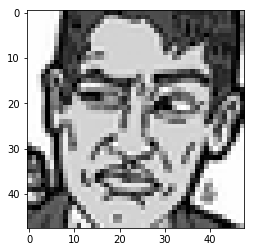

In [37]:
plt.imshow(im, cmap='gray')
plt.show()

In [84]:
model.save('model_vgg16.h5')

In [85]:
model.save_weights('model_weights_vgg16.h5')

In [39]:
pred = model.predict_classes(x_test1, batch_size=128)

3589/3589 [==============================] - 4s     


In [40]:
len(pred)

3589

In [41]:
pred[:100]

array([4, 1, 0, 6, 3, 3, 2, 0, 6, 3, 3, 0, 4, 2, 6, 5, 5, 5, 5, 3, 6, 5, 4,
       6, 0, 6, 4, 3, 5, 5, 3, 6, 3, 6, 0, 2, 0, 2, 6, 3, 0, 4, 3, 6, 6, 0,
       5, 3, 5, 6, 4, 3, 5, 6, 4, 3, 2, 5, 5, 3, 6, 3, 6, 3, 5, 3, 5, 6, 6,
       3, 6, 5, 6, 3, 2, 6, 5, 6, 3, 2, 0, 0, 0, 4, 5, 4, 3, 3, 3, 3, 6, 5,
       6, 0, 0, 0, 5, 3, 3, 0])

In [68]:
accu = model.evaluate(x_test1, y_test1, batch_size=128)

3584/3589 [============================>.] - ETA: 0s

In [69]:
accu

[1.6779126659944947, 0.61549178044853781]

In [70]:
accu2 = model.evaluate(x_test2, y_test2, batch_size=128)

3584/3589 [============================>.] - ETA: 0s

In [71]:
accu2

[1.6725260593094644, 0.6115909724157147]

1/1 [==============================] - 0s
[1]


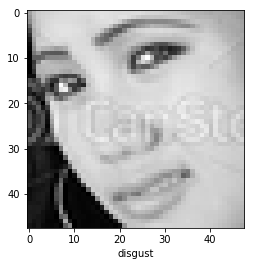

예측 :  disgust  정답 :  disgust


In [73]:
i = 1
im = np.array(x_test1[i], dtype=np.uint8)
plt.imshow(im.reshape(48, 48), cmap='gray')
x = model.predict_classes(x_test1[i].reshape(1, 48, 48, 1))
print(x)
plt.xlabel(emotion[x[0]])
plt.show()
print("예측 : ", emotion[x[0]], " 정답 : ", emotion[np.argmax(y_test1[i])])

1/1 [==============================] - 0s
[0]


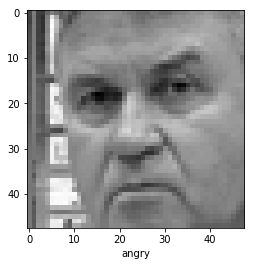

예측 :  angry  정답 :  sad


In [74]:
i = 2
im = np.array(x_test1[i], dtype=np.uint8)
plt.imshow(im.reshape(48, 48), cmap='gray')
x = model.predict_classes(x_test1[i].reshape(1, 48, 48, 1))
print(x)
plt.xlabel(emotion[x[0]])
plt.show()
print("예측 : ", emotion[x[0]], " 정답 : ", emotion[np.argmax(y_test1[i])])

1/1 [==============================] - 0s
[6]


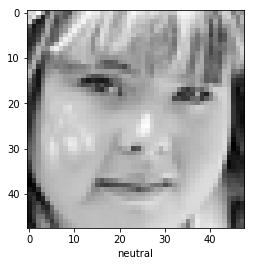

예측 :  neutral  정답 :  neutral


In [75]:
i = 3
im = np.array(x_test1[i], dtype=np.uint8)
plt.imshow(im.reshape(48, 48), cmap='gray')
x = model.predict_classes(x_test1[i].reshape(1, 48, 48, 1))
print(x)
plt.xlabel(emotion[x[0]])
plt.show()
print("예측 : ", emotion[x[0]], " 정답 : ", emotion[np.argmax(y_test1[i])])

1/1 [==============================] - 0s
[3]


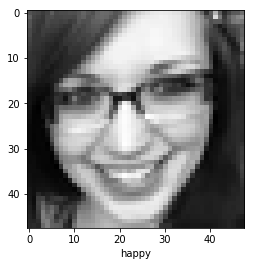

예측 :  happy  정답 :  happy


In [76]:
i = 4
im = np.array(x_test1[i], dtype=np.uint8)
plt.imshow(im.reshape(48, 48), cmap='gray')
x = model.predict_classes(x_test1[i].reshape(1, 48, 48, 1))
print(x)
plt.xlabel(emotion[x[0]])
plt.show()
print("예측 : ", emotion[x[0]], " 정답 : ", emotion[np.argmax(y_test1[i])])

1/1 [==============================] - 0s
[3]


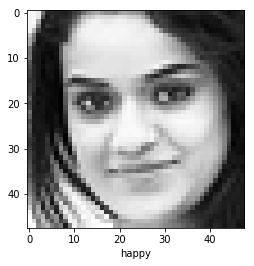

예측 :  happy  정답 :  happy


In [77]:
i = 5
im = np.array(x_test1[i], dtype=np.uint8)
plt.imshow(im.reshape(48, 48), cmap='gray')
x = model.predict_classes(x_test1[i].reshape(1, 48, 48, 1))
print(x)
plt.xlabel(emotion[x[0]])
plt.show()
print("예측 : ", emotion[x[0]], " 정답 : ", emotion[np.argmax(y_test1[i])])

1/1 [==============================] - 0s
[2]


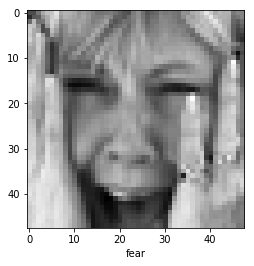

예측 :  fear  정답 :  fear


In [78]:
i = 6
im = np.array(x_test1[i], dtype=np.uint8)
plt.imshow(im.reshape(48, 48), cmap='gray')
x = model.predict_classes(x_test1[i].reshape(1, 48, 48, 1))
print(x)
plt.xlabel(emotion[x[0]])
plt.show()
print("예측 : ", emotion[x[0]], " 정답 : ", emotion[np.argmax(y_test1[i])])

1/1 [==============================] - 0s
[4]


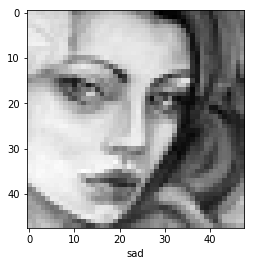

예측 :  sad  정답 :  angry


In [79]:
i = 7
im = np.array(x_test1[i], dtype=np.uint8)
plt.imshow(im.reshape(48, 48), cmap='gray')
x = model.predict_classes(x_test1[i].reshape(1, 48, 48, 1))
print(x)
plt.xlabel(emotion[x[0]])
plt.show()
print("예측 : ", emotion[x[0]], " 정답 : ", emotion[np.argmax(y_test1[i])])

1/1 [==============================] - 0s
[4]


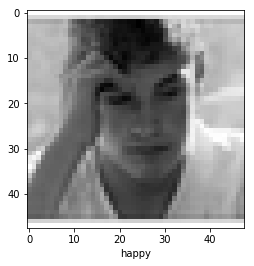

예측 :  happy  정답 :  fear


In [80]:
i = 8
im = np.array(x_test1[i], dtype=np.uint8)
plt.imshow(im.reshape(48, 48), cmap='gray')
x = model.predict_classes(x_test1[i].reshape(1, 48, 48, 1))
print(x)
plt.xlabel(emotion[pred[x[0]]])
plt.show()
print("예측 : ", emotion[pred[x[0]]], " 정답 : ", emotion[np.argmax(y_test1[i])])

1/1 [==============================] - 0s
[3]


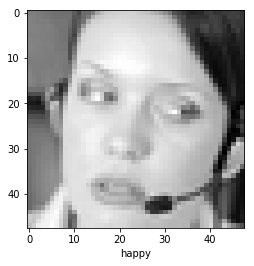

예측 :  happy  정답 :  angry


In [82]:
i = 9
im = np.array(x_test1[i], dtype=np.uint8)
plt.imshow(im.reshape(48, 48), cmap='gray')
x = model.predict_classes(x_test1[i].reshape(1, 48, 48, 1))
print(x)
plt.xlabel(emotion[x[0]])
plt.show()
print("예측 : ", emotion[x[0]], " 정답 : ", emotion[np.argmax(y_test1[i])])

1/1 [==============================] - 0s
[3]


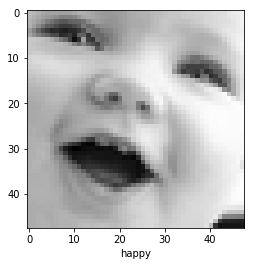

예측 :  happy  정답 :  happy


In [83]:
i = 10
im = np.array(x_test1[i], dtype=np.uint8)
plt.imshow(im.reshape(48, 48), cmap='gray')
x = model.predict_classes(x_test1[i].reshape(1, 48, 48, 1))
print(x)
plt.xlabel(emotion[x[0]])
plt.show()
print("예측 : ", emotion[x[0]], " 정답 : ", emotion[np.argmax(y_test1[i])])